In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/CS\ 269\ Final\ Project

Mounted at /content/drive/
/content/drive/MyDrive/CS 269 Final Project


# Imports

In [ ]:
import pandas as pd
import os
import cv2
import numpy as np
from torch.utils.data import Dataset
from torch import Tensor
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pickle
from torch import optim
import sys
sys.path.insert(1, '/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project/burned-area-baseline')

from neural_net import dataset

In [ ]:
print(sys.path)

['/content', '/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project/burned-area-baseline', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
!ls '/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project/Satellite_burned_area_dataset'
# Run this command to set the folder_list

EMSR207_01MIRANDADOCORVO_02GRADING_MAP_v2_vector
EMSR207_02LOUSA_02GRADING_MAP_v2_vector
EMSR207_03PAMPILHOSADASERRA_02GRADING_MAP_v2_vector
EMSR207_04AVELAR_02GRADING_MAP_v2_vector
EMSR207_05PEDROGAOGRANDE_02GRADING_MAP_v2_vector
EMSR207_06MADEIRA_02GRADING_MAP_v2_vector
EMSR207_07ALVAIAZERE_02GRADING_MAP_v2_vector
EMSR207_08CERNACHEDOBONJARDIM_02GRADING_MAP_v2_vector
EMSR207_10ORVALHO_02GRADING_MAP_v2_vector
EMSR209_01MOGUER_02GRADING_MAP_v2_vector
EMSR209_02MAZAGON_02GRADING_MAP_v2_vector
EMSR209_03LOSCABEZUDOS_02GRADING_MAP_v1_vector
EMSR209_04CHOZASDELAPOLEOSA_02GRADING_MAP_v1_vector
EMSR209_05MAZAGONDETAIL01_02GRADING_MAP_v1_vector
EMSR210_04TRASLASIERRA_02GRADING_MAP_v2_vector
EMSR210_05ELCAMPILLOOVERVIEW_02GRADING_MAP_v1_vector
EMSR211_01SONEJAWEST_02GRADING_MAP_v1_vector
EMSR211_02SONEJA_02GRADING_MAP_v1_vector
EMSR213_01VESUVIO_02GRADING_MAP_v2_vector
EMSR213_03FRANCOFONTE_02GRADING_MAP_v1_vector
EMSR213_04AVOLA_02GRADING_MAP_v1_vector
EMSR213_06MONREALE_02GRADING_MAP_v2_vect

# Dataset from original GitHub

In [ ]:
main_folder = 'Satellite_burned_area_dataset'
satellite_data = pd.read_csv("satellite_data.csv")
# folder_list = satellite_data["folder"] # To use this, move everything from the dataset_unused folder back into the main_folder
# folder_list = ['EMSR207_01MIRANDADOCORVO_02GRADING_MAP_v2_vector', 'EMSR207_02LOUSA_02GRADING_MAP_v2_vector', 'EMSR207_03PAMPILHOSADASERRA_02GRADING_MAP_v2_vector', 'EMSR207_04AVELAR_02GRADING_MAP_v2_vector', 'EMSR207_05PEDROGAOGRANDE_02GRADING_MAP_v2_vector', 'EMSR207_06MADEIRA_02GRADING_MAP_v2_vector', 'EMSR207_07ALVAIAZERE_02GRADING_MAP_v2_vector', 'EMSR207_08CERNACHEDOBONJARDIM_02GRADING_MAP_v2_vector', 'EMSR207_10ORVALHO_02GRADING_MAP_v2_vector', 'EMSR209_01MOGUER_02GRADING_MAP_v2_vector', 'EMSR209_02MAZAGON_02GRADING_MAP_v2_vector', 'EMSR209_03LOSCABEZUDOS_02GRADING_MAP_v1_vector', 'EMSR209_04CHOZASDELAPOLEOSA_02GRADING_MAP_v1_vector', 'EMSR209_05MAZAGONDETAIL01_02GRADING_MAP_v1_vector', 'EMSR210_04TRASLASIERRA_02GRADING_MAP_v2_vector', 'EMSR210_05ELCAMPILLOOVERVIEW_02GRADING_MAP_v1_vector', 'EMSR211_01SONEJAWEST_02GRADING_MAP_v1_vector', 'EMSR211_02SONEJA_02GRADING_MAP_v1_vector', 'EMSR213_01VESUVIO_02GRADING_MAP_v2_vector', 'EMSR213_03FRANCOFONTE_02GRADING_MAP_v1_vector', 'EMSR213_04AVOLA_02GRADING_MAP_v1_vector', 'EMSR213_06MONREALE_02GRADING_MAP_v2_vector', 'EMSR213_07SANVITOLOCAPO_02GRADING_MAP_v2_vector', 'EMSR213_08BLUFI_02GRADING_MAP_v2_vector', 'EMSR213_09MISTRETTA_02GRADING_MAP_v2_vector', 'EMSR213_10MESSINA_02GRADING_MAP_v1_vector', 'EMSR213_11NASO_02GRADING_MAP_v1_vector', 'EMSR213_12ETNANORD_02GRADING_MAP_v1_vector', 'EMSR214_01OLMETA_02GRADING_MAP_v2_vector', 'EMSR214_02LABASTIDONNE_02GRADING_MAP_v1_vector', 'EMSR214_04MARSEILLE_02GRADING_MAP_v1_vector', 'EMSR214_05LELAVANDOU_02GRADING_MAP_v1_vector', 'EMSR214_06COGOLIN_02GRADING_MAP_v2_vector', 'EMSR216_01LOSCOLLADOS_02GRADING_MAP_v1_vector', 'EMSR216_02TORREPEDRO_02GRADING_MAP_v1_vector', 'EMSR216_04RALA_02GRADING_MAP_v1_vector', 'EMSR216_05ELCALAR_02GRADING_MAP_v2_vector', 'EMSR217_01DUKAT_02GRADING_MAP_v2_vector', 'EMSR217_02VRANISHT_02GRADING_MAP_v1_vector', 'EMSR219_01SEGURADELASIERRA_02GRADING_MAP_v1_vector', 'EMSR221_01OGLIASTRO_02GRADING_MAP_v2_vector', 'EMSR226_01DABA_02GRADING_MAP_v1_vector', 'EMSR227_01ENCINEDO_02GRADING_MAP_v2_vector', 'EMSR227_02CORPORALES_02GRADING_MAP_v2_vector', 'EMSR227_03SANTAEULALIADECABRERA_02GRADING_MAP_v2_vector', 'EMSR237_03ELMADRONO_02GRADING_MAP_v1_vector', 'EMSR237_04ELCASTILLODELASGUARDAS_02GRADING_MAP_v1_vector', 'EMSR239_05ALMADENDELAPLATAOVERVIEW_02GRADING_MAP_v1_vector', 'EMSR248_01PINODELORO_02GRADING_MAP_v1_vector', 'EMSR248_04HOYOSDEMIGUELMUNOZ_02GRADING_MAP_v1_vector', 'EMSR250_01MARINHAGRANDE_02GRADING_MAP_v2_vector', 'EMSR250_04CORTES_02GRADING_MAP_v2_vector', 'EMSR252_02HAUTECORSEDETAIL_02GRADING_MAP_v1_vector', 'EMSR254_01PORTELADEAGUIAR_02GRADING_MAP_v2_vector', 'EMSR254_02SILVAN_02GRADING_MAP_v2_vector', 'EMSR254_03PERENADELARIBERA_02GRADING_MAP_v2_vector', 'EMSR281_01KIRTOMY_02GRADING_MAP_v1_vector', 'EMSR290_03MANSBO_02GRADING_MAP_v1_vector', 'EMSR298_02HAMMARSTRAND_02GRADING_MAP_v1_vector', 'EMSR298_05STRANDASMYRVALLEN_02GRADING_MAP_v1_vector', 'EMSR298_06GROTINGEN_02GRADING_MAP_v1_vector', 'EMSR302_01NERVA_02GRADING_MAP_v1_vector', 'EMSR302_07ELPERALEJO_02GRADING_MAP_v1_vector', 'EMSR365_AOI01_GRA_PRODUCT_r1_RTP01_v1_vector', 'EMSR368_AOI01_GRA_PRODUCT_r1_RTP01_v3_vector', 'EMSR371_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector', 'EMSR372_AOI04_GRA_PRODUCT_r1_RTP01_v3_vector', 'EMSR373_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector']
# folder_list = ['EMSR237_03ELMADRONO_02GRADING_MAP_v1_vector']
folder_list = ['EMSR227_02CORPORALES_02GRADING_MAP_v2_vector']

dataset_config = {
        'folder': main_folder,
        'mask_intervals': [(0, 36), (37, 255)],
        'mask_one_hot': False,
        'height': 512,
        'width': 512,
        'product_list': ['sentinel2'],
        'mode': 'post',
        'filter_validity_mask': True,
        'transform': None,
        'process_dict': {
            'sentinel2': [0, 1, 2]
        },
        'activation_date_csv': "satellite_data.csv",
        'mask_filtering': False,
        'only_burnt': True
    }

# import pdb; pdb.set_trace()
ds_temp = dataset.SatelliteDataset(folder_list=folder_list, **dataset_config)
# ds = dataset.SatelliteDataset(folder_list=folder_list, **dataset_config)
# If you run into issues, uncomment the following code for debugging
# If you run out of RAM, remove some folders from the folder here
# I removed some folders: they are now in dataset_unused

# for folder in folder_list:
#     print(f"Trying to load data from folder: {folder}")
#     try:
#         ds_temp = dataset.SatelliteDataset(folder_list=[folder], **dataset_config)  # Create a temporary dataset with just one folder
#         print(f"Successfully loaded data from folder: {folder}")
#     except Exception as e:
#         print(f"Error loading data from folder {folder}: {e}")

Empty folder found Satellite_burned_area_dataset/EMSR211_01SONEJAWEST_02GRADING_MAP_v1_vector for product sentinel2


/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project/burned-area-baseline/neural_net/image_processor.py:343: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  result = rescale(img, max(rescale_height, rescale_width), multichannel=True)


Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR211_01SONEJAWEST_02GRADING_MAP_v1_vector
product: sentinel2
mode: post
date: 
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR214_02LABASTIDONNE_02GRADING_MAP_v1_vector
product: sentinel2
mode: post
date: 2017-08-18
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR250_04CORTES_02GRADING_MAP_v2_vector
product: sentinel2
mode: post
date: 2017-10-22
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR252_02HAUTECORSEDETAIL_02GRADING_MAP_v1_vector
product: sentinel2
mode: post
date: 2017-10-24
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR254_01PORTELADEAGUIAR_02GRADING_MAP_v2_vector
product: sentinel2
mode: post
date: 2017-10-22
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR254_02SILVAN_02GRADING_MAP_v2_vector
product: sentinel2
mode: post
date: 2017-10-22
Invalid product requested:


# SAM Model

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-70rri842
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-70rri842
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=e14d6e6c5c1344cb4793e990cfe7d3723d08b635259e71f03e0ebd1add245036
  Stored in directory: /tmp/pip-ephem-wheel-cache-af80lwbf/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        plt.text(ann['bbox'][0], ann['bbox'][1], ann['predicted_iou'], bbox=dict(fill=True, edgecolor='red', linewidth=2), color='white')
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
ds = ds_temp

In [ ]:
image = ds.__getitem__(0)["image"]
mask = ds.__getitem__(0)["mask"]

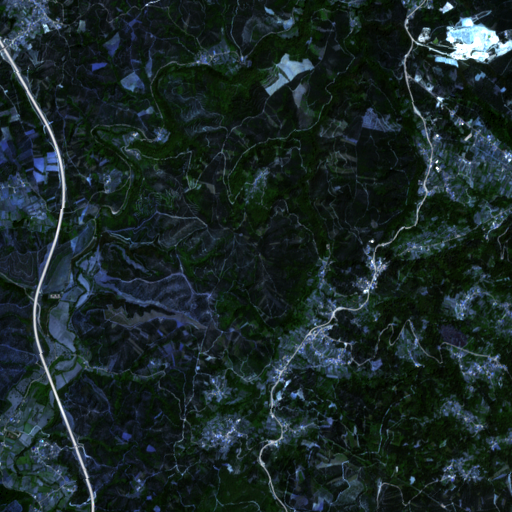

In [ ]:
cv2_imshow(np.transpose(image, (1, 2, 0)))

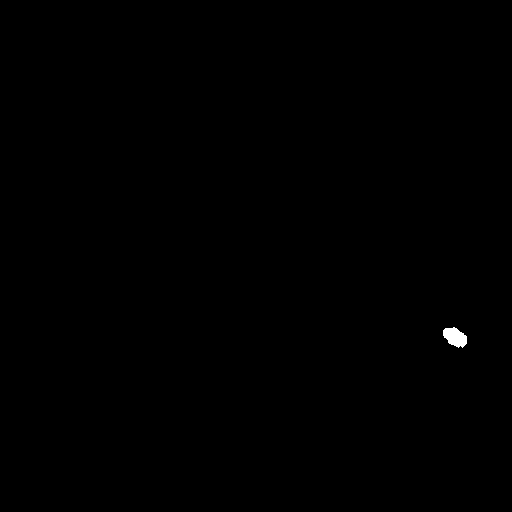

In [ ]:
cv2_imshow(mask * 255)

In [ ]:
masks = mask_generator.generate(np.transpose(image, (1, 2, 0)))

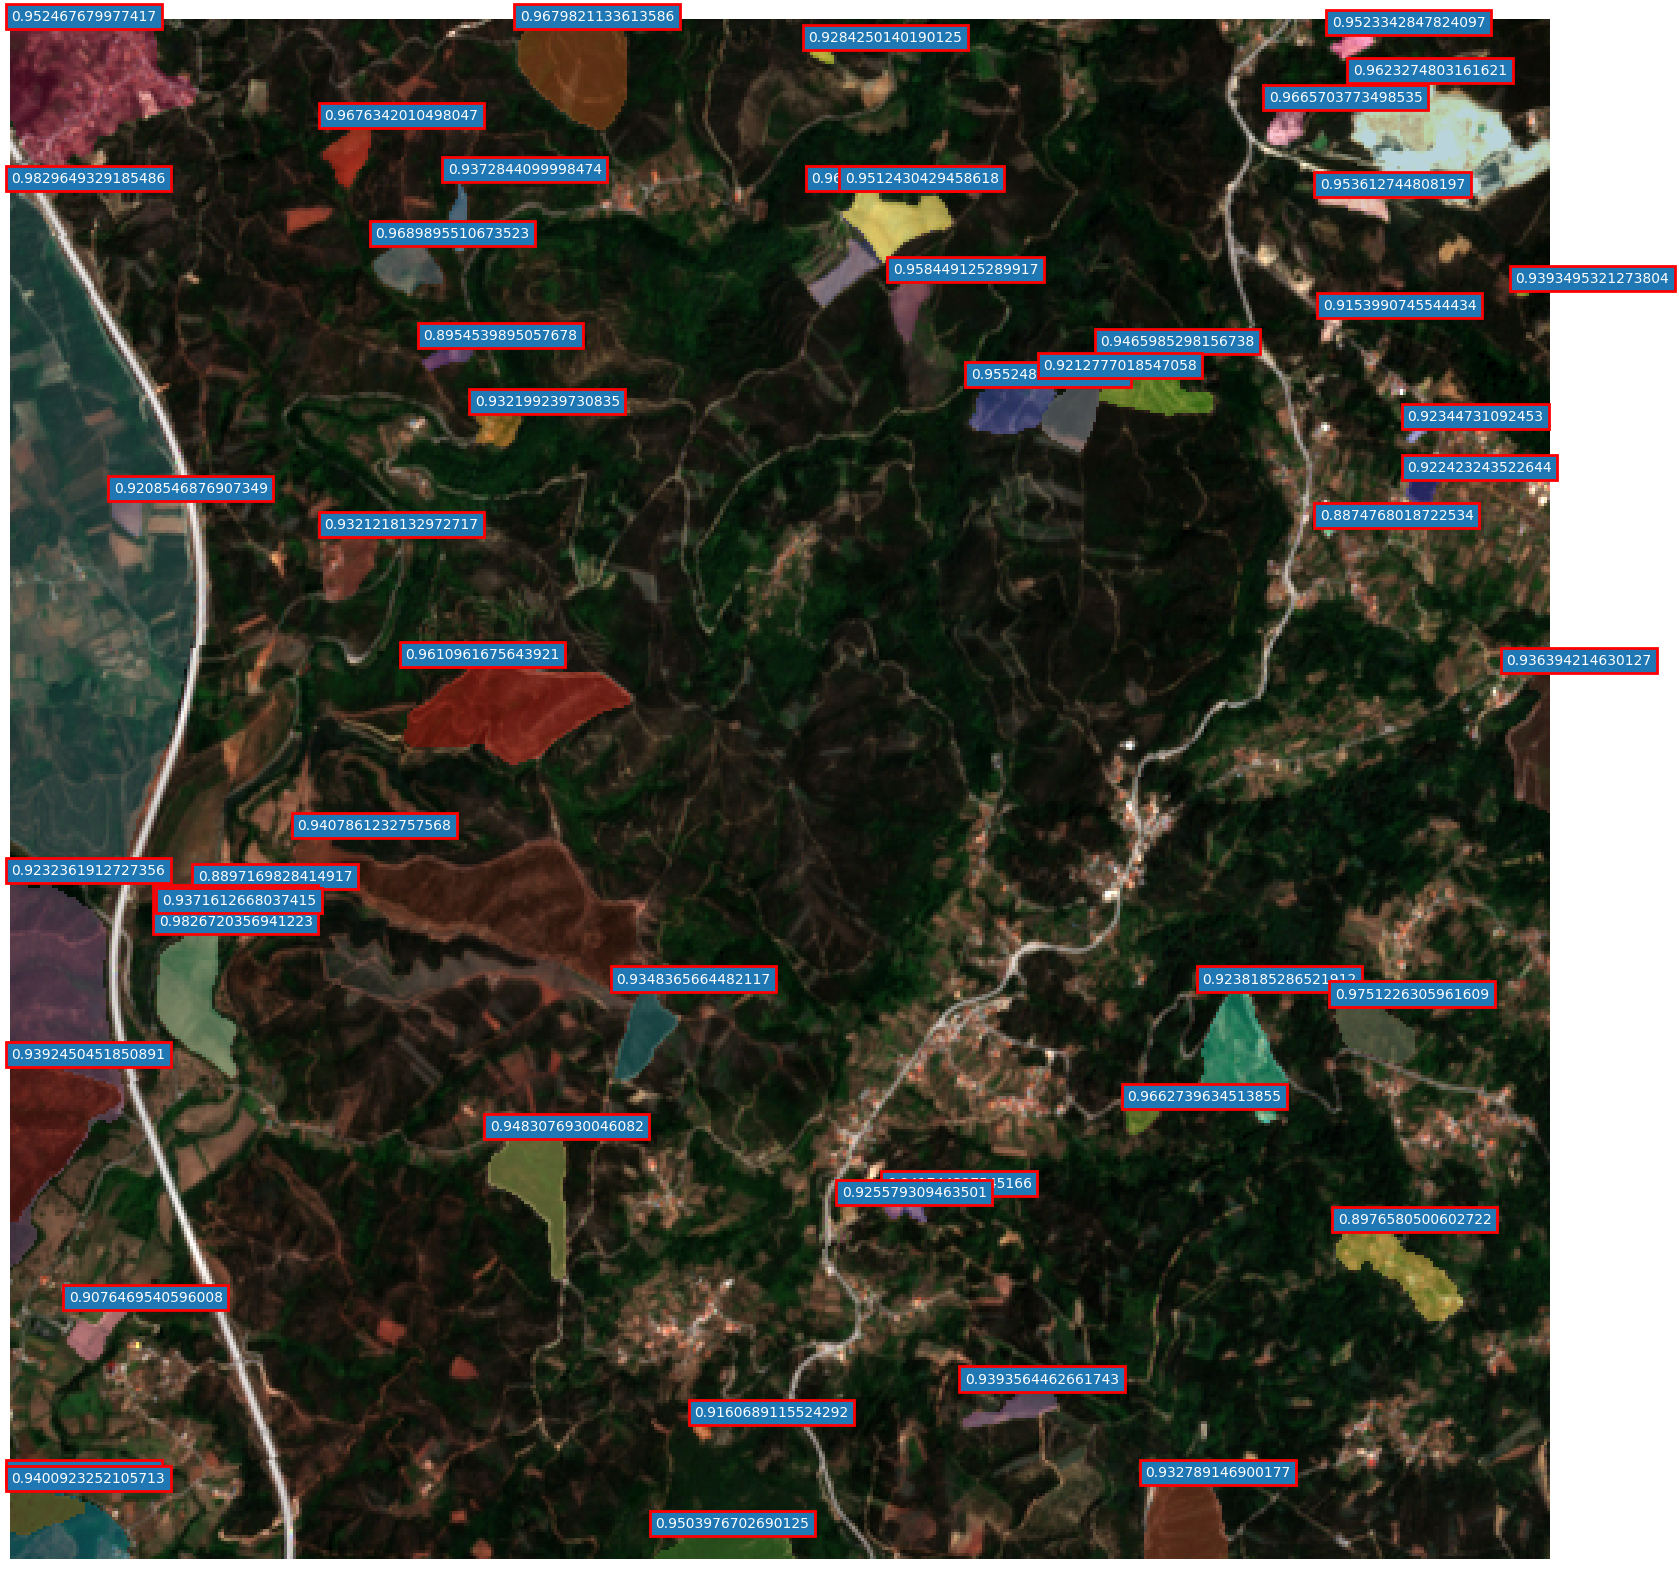

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(np.transpose(image, (1, 2, 0)).astype("uint8"))
show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
ious = []

for i, data in enumerate(ds, 0):
  if i % 10 == 0:
    print(i)
  image = data["image"]
  masks = mask_generator.generate(np.transpose(image, (1, 2, 0)))
  iou = []
  for mask in masks:
    iou.append(mask['predicted_iou'])
  ious.append(sum(iou) / len(iou))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
2.9099537097204107


In [ ]:
print(sum(ious) / len(ious))

0.9445923036788767


# Finetune SAM

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms

In [ ]:
predictor = SamPredictor(sam)

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resize to the size a model expects
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalization values for pre-trained PyTorch models
])

# Create a DataLoader
dataloader = DataLoader(ds, batch_size=4, shuffle=True)

# Fine-tuning the model
device = torch.device('cpu')
predictor.model.to(device)
predictor.model.train()

# Define loss function and optimizer
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(predictor.model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs = data["image"]
        labels = data["mask"]

        keys = ["image"] * inputs.shape[0]
        inputs = [dict(zip(keys, l.float().to(device))) for l in inputs]
        inputs = [dict(item, **{'original_size': 512}) for item in inputs]

        labels = np.squeeze(labels)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = predictor.model(inputs, multimask_output = False)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [ ]:
torch.save(predictor.model.state_dict(), "sam_vit_h_4b8939_finetune.pth")